 # EDA ( Análisis Exploratorio de Datos)

#### En este Jupyter Notebook se realiza un EDA de los datasets limpios y transformados, de esta manera, me permite observar directamente las tendencias, valores ouliers o atípicos y correlaciones que se pueden encontrar en los datos, ya que con los archivos originales no es posible tener una exploración profunda de los datos

In [81]:
# Librerías a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import wordcloud
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

In [15]:
# Cargamos los archivos csv para analisar

df_games = pd.read_csv('SteamGames.csv', low_memory=False) # El atributo 'low_memory' permite que no haya pérdida de precisión o corrupción de datos caundo son archivos pesados

df_reviewitem = pd.read_csv('Reviews_items.csv', low_memory=False) 

In [14]:
# Inicialmente, observamos los datos de manera general

display(df_games.info())
display(df_reviewitem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 22530 non-null  int64 
 1   genres                     22530 non-null  object
 2   title                      22530 non-null  object
 3   release_date               22530 non-null  object
 4   id                         22530 non-null  int64 
 5   Action                     22530 non-null  int64 
 6   Adventure                  22530 non-null  int64 
 7   Animation &amp; Modeling   22530 non-null  int64 
 8   Audio Production           22530 non-null  int64 
 9   Casual                     22530 non-null  int64 
 10  Design &amp; Illustration  22530 non-null  int64 
 11  Early Access               22530 non-null  int64 
 12  Education                  22530 non-null  int64 
 13  Free to Play               22530 non-null  int64 
 14  Indie 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61094 entries, 0 to 61093
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61094 non-null  int64  
 1   user_id             61094 non-null  object 
 2   funny               8429 non-null   object 
 3   last_edited         6343 non-null   object 
 4   item_id             61065 non-null  float64
 5   helpful             61065 non-null  object 
 6   recommend           61065 non-null  object 
 7   review              61035 non-null  object 
 8   0                   0 non-null      float64
 9   posted year         50565 non-null  float64
 10  sentiment_analysis  61094 non-null  int64  
 11  items_count         61094 non-null  int64  
 12  steam_id            61094 non-null  int64  
 13  playtime_forever    61094 non-null  int64  
 14  playtime_2weeks     61094 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 7.0+

None

In [17]:
# Creamos una df para cada archivo sólo con columnas numéricas para realizar un análisis descriptivo

df_num_games = df_games.select_dtypes(include = (float, int))
df_num_reviewitem = df_reviewitem.select_dtypes(include = (float, int))

display(df_num_games.describe())
display(df_num_reviewitem.describe())

,Unnamed: 0,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
count,22530.000000,2.253000e+04,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,...,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000
mean,104559.835331,4.307164e+05,0.418553,0.311629,0.003684,0.001332,0.278873,0.011718,0.060364,0.002352,...,0.000488,0.169063,0.042033,0.209676,0.001598,0.045806,0.231380,0.006170,0.000799,0.008655
std,9671.206431,1.918424e+05,0.493333,0.463169,0.060585,0.036467,0.448455,0.107615,0.238165,0.048446,...,0.022091,0.374816,0.200669,0.407086,0.039942,0.209068,0.421724,0.078306,0.028255,0.092632
min,88310.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96070.250000,3.022950e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104548.500000,4.269285e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113197.750000,5.807075e+05,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120443.000000,2.028850e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Unnamed: 0,item_id,0,posted year,sentiment_analysis,items_count,steam_id,playtime_forever,playtime_2weeks
count,61094.00000,61065.000000,0.0,50565.000000,61094.000000,61094.000000,6.109400e+04,61094.000000,61094.000000
mean,30546.50000,170402.200704,NaN,2014.154099,1.394572,127.861394,7.656120e+16,4025.660998,20.353897
std,17636.46301,132053.440714,NaN,0.840274,0.638140,222.269803,3.938465e+07,13016.894751,195.433067
min,0.00000,10.000000,NaN,2010.000000,0.000000,0.000000,7.656120e+16,0.000000,0.000000
25%,15273.25000,8980.000000,NaN,2014.000000,1.000000,40.000000,7.656120e+16,13.000000,0.000000
50%,30546.50000,218230.000000,NaN,2014.000000,1.000000,82.500000,7.656120e+16,344.000000,0.000000
75%,45819.75000,262060.000000,NaN,2015.000000,2.000000,150.000000,7.656120e+16,2057.000000,0.000000
max,61093.00000,527340.000000,NaN,2015.000000,2.000000,7762.000000,7.656120e+16,356217.000000,9089.000000


In [23]:
# Dropeo algunas columnas que no aportan valor y me brindan una mejor interpretación del análisis

df_num_games.drop('Unnamed: 0', axis=1, inplace=True)
df_num_reviewitem.drop(['Unnamed: 0', '0'], axis=1, inplace=True)

### Exploración del análisis de sentimientos

In [58]:
# Realizamos el porcentaje de la puntuación de sentimiento y tambien de las reseñas recomendadas

conteo = df_reviewitem['sentiment_analysis'].value_counts()

porcentajes = conteo / len(df_reviewitem['sentiment_analysis']) * 100

porcentajes.round(1)

sentiment_analysis
2    47.9
1    43.7
0     8.4
Name: count, dtype: float64

In [63]:
recomendado = df_reviewitem['recommend'].value_counts()

porcentaje = recomendado / len(df_reviewitem['recommend']) * 100

porcentaje.round(1)

recommend
True     88.5
False    11.5
Name: count, dtype: float64

##### Se puede concluir que las reseñas buenas son las que predominan con un valor un valor de 47.9%, seguido de cerca con las reseñas neutras con 43.7%, por lo que es más positivo la interacción o la persepción que tienen los usuarios con los juegos de la plataforma. Sin embargo obtenemos un 88.5% que recomiendan los juegos, por lo que se valida que la experiencia de los juegos es más positiva que negativa.

 # Relaciones entre las variables

<Axes: >

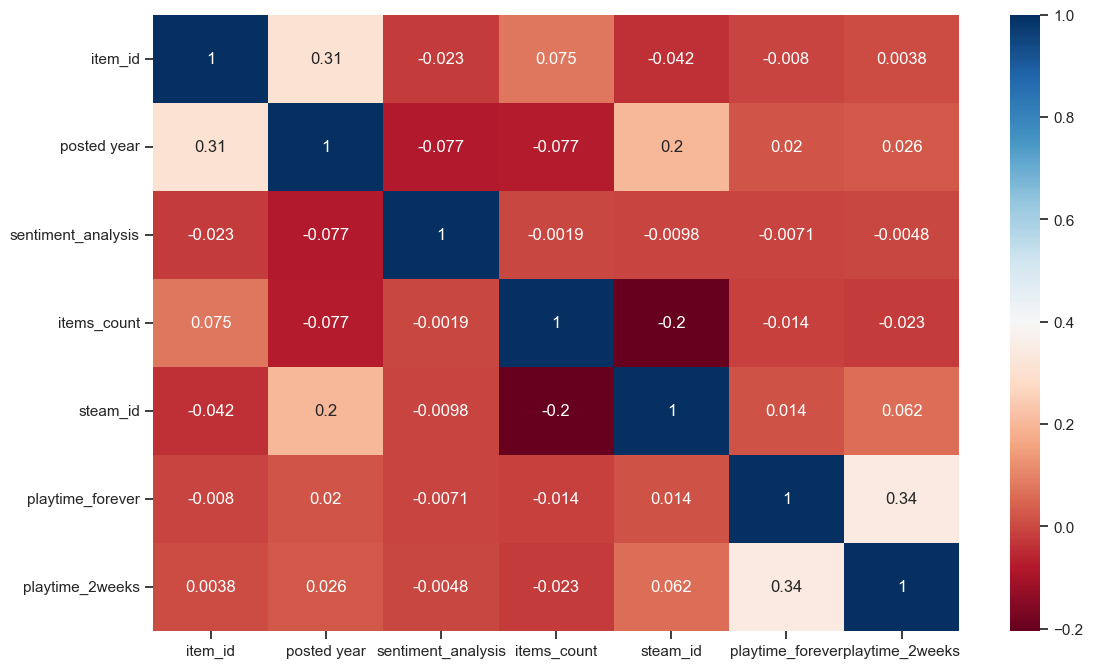

In [51]:
# Construimos una matriz de calor para observar algún tipo de relación entre las variables

matrix = df_num_reviewitem.corr()
plt.figure(figsize= (13,8))
sns.heatmap(matrix, annot=True, cmap='RdBu')

##### Se observa que en la matriz, no hay una correlación fuerte significativa entre las variables, quiere decir que cada columna pertenece a su propia categoría

## Gráfico de dispersión

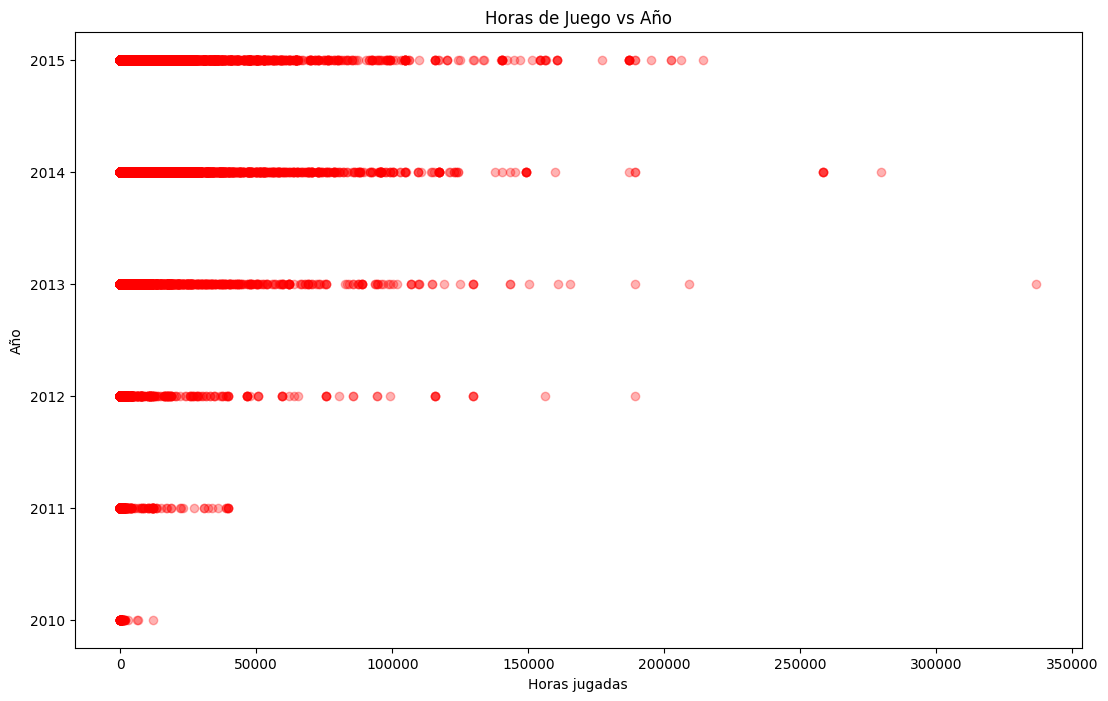

In [39]:
# Construimos un gráfico de dispersión que me permita observar cómo es la tendencia de las horas jugadas de los usuarios al pasar los años

y = df_num_reviewitem['posted year']
x = df_num_reviewitem['playtime_forever']

plt.figure(figsize=(13,8))
plt.scatter(x,y, color='red', alpha=0.3)

plt.title('Horas de Juego vs Año')
plt.xlabel('Horas jugadas')
plt.ylabel('Año')
plt.show()


##### De manera general, se puede observar una leve tendencia donde a medida que incrementan los años, encontramos una mayor ocurrencia de horas jugadas por los usuarios

## Gráfico de barras

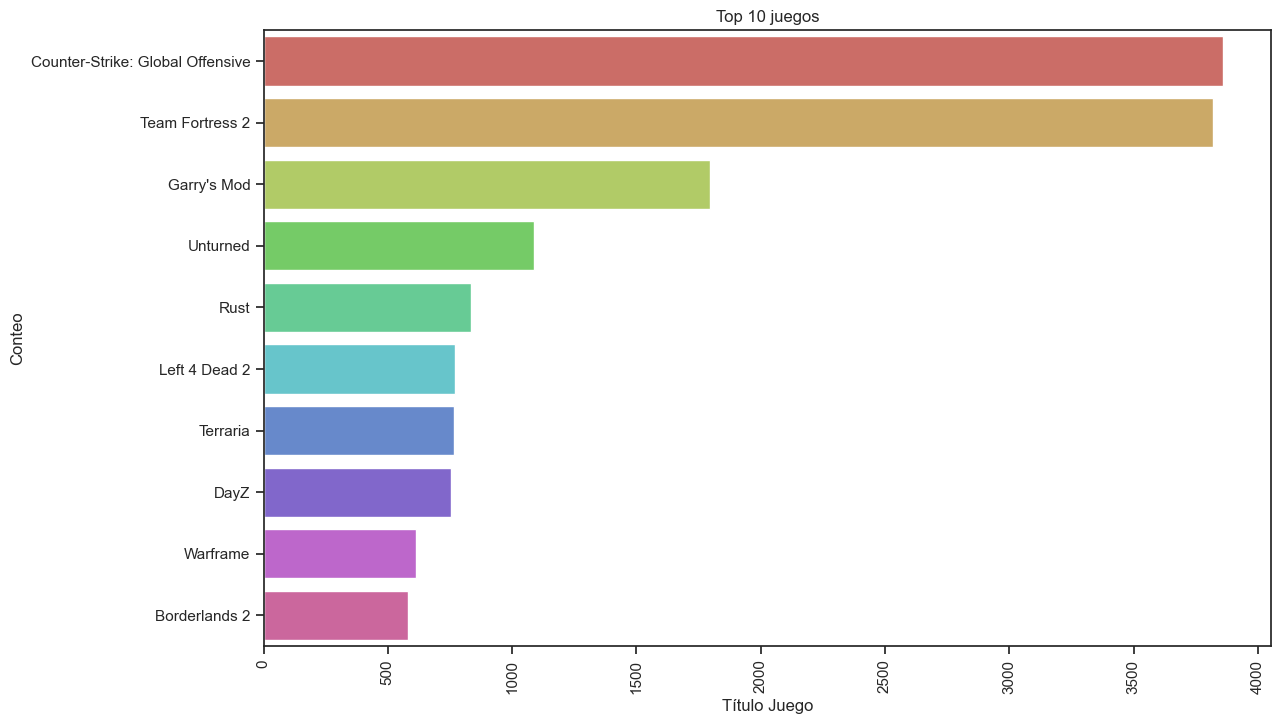

In [84]:
# Construimos un gráfico de barras que permita observar el Top 10 de juegos más frecuentes entrre usuarios

# Cargo el df
df = pd.read_csv('Unificado.csv', low_memory=False)

# Filtro los 10 títulos más contabilizados en la columna 'title'
top_titles = df['title'].value_counts().nlargest(10)

# Creo el gráfico de barras
plt.figure(figsize=(13, 8))
sns.barplot(y=top_titles.index, x=top_titles.values, palette='hls')
plt.xlabel('Título Juego')
plt.ylabel('Conteo')
plt.title('Top 10 juegos')
plt.xticks(rotation=90)
plt.show()

##### Rápidamente podemos tener una percepción de los juegos más populares entre los usuarios, donde de manera significativa el 'Counter-Strike' y 'Team Fortress 2' predominan por encima de los demás

## Gráfico de líneas


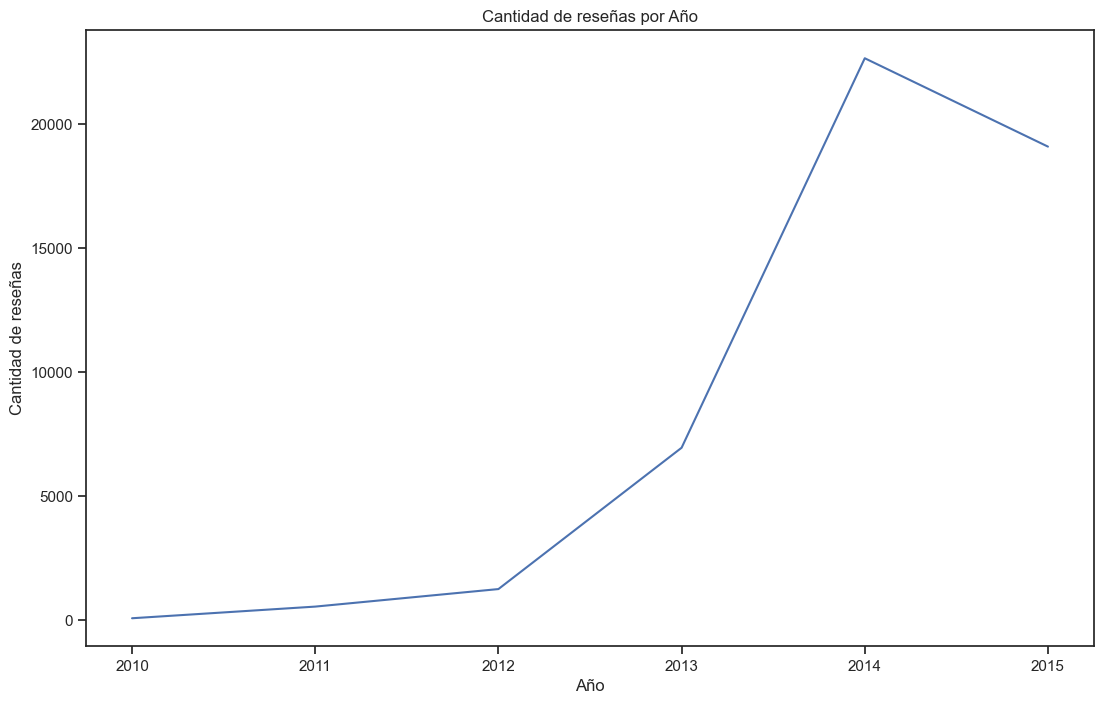

In [64]:
#Construimos un gráfico de lineas que me permita observar el comportamiento de la cantidad de reseñas por año

df_conteo = df_reviewitem.groupby('posted year').count()

plt.figure(figsize=(13,8))
sns.lineplot(data= df_conteo, x='posted year', y='review')
plt.xlabel('Año')
plt.ylabel('Cantidad de reseñas')
plt.title('Cantidad de reseñas por Año')
plt.show()

##### Observamos un aumento significativo de las reseñas a medida que pasan los años, por lo que se puede obtener una percepción de los juegos más precisa

## Gráfico de columnas apiladas

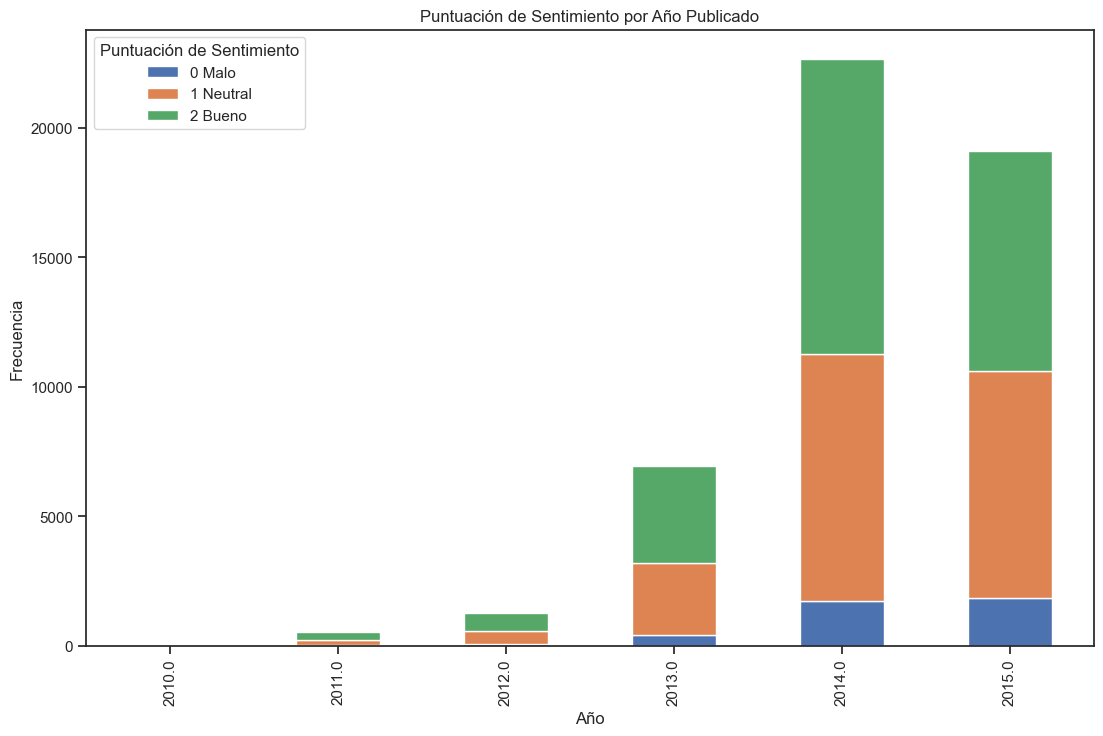

In [65]:
# Construimos un gráfico de barras que permita observar la frecuencia de las puntuaciones de sentimiento (Bueno, neutro y malo) con respecto a cada año publicado

tabla_ocurrencia = pd.crosstab(df_num_reviewitem['posted year'], df_num_reviewitem['sentiment_analysis'])

sns.set(style='ticks')
tabla_ocurrencia.plot(kind='bar', stacked=True, figsize=(13,8))
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(['0 Malo', '1 Neutral', '2 Bueno'], title='Puntuación de Sentimiento', loc='upper left')
plt.title('Puntuación de Sentimiento por Año Publicado')
plt.show()


##### Observamos que a medida que pasan los años, podemos encontrar una mayor interacción de comentarios o reseñas en los videojuegos y que además, tambien son mas frecuentes los comentarios buenos que los malos, lo que da una buena señal del catálogo de juegos que ofrece la plataforma Steam

## Nube de palabras 

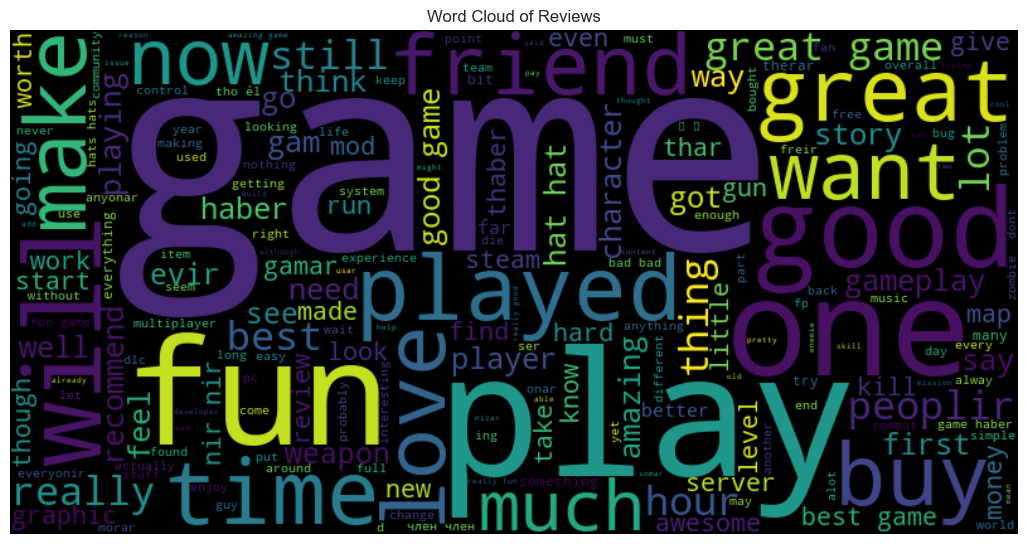

In [83]:
import pandas as pd
import spacy
from wordcloud import WordCloud  
import matplotlib.pyplot as plt

# Carga el modelo de lenguaje en español de spacy

nlp = spacy.load("es_core_news_sm")

# Función de procesamiento de texto usando(spacy)

def preprocess_text_spacy(text):
    if pd.isnull(text):
        return ''
    doc = nlp(text.lower()) # Conversión el texto a minúsculas, asegurando consistencia
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop] # Extraigo del texto la forma básica de las palabras y filtro las palabras que no aportan valor tales como 'el','un'
    return ' '.join(tokens)


# Aplico la función de procesamiento a la columna 'review' del df

df_reviewitem['processed_review'] = df_reviewitem['review'].apply(preprocess_text_spacy)


# Uno todos los textos procesados en una sola cadena 

all_reviews = ' '.join(df_reviewitem['processed_review'])


# Genero la nube de palabras

wordcloud = WordCloud(width=800, height=400)  
wordcloud.generate(all_reviews)  


plt.figure(figsize=(13, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

##### Con la nube de palabras podemos tener una idea gráfica más clara de cuáles palabras son más frecuentes en las reseñas, de esta manera podemos ayudar al sistema de predicción